# Import  libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np
import matplotlib
from matplotlib import cm
import scipy.cluster.hierarchy as sch

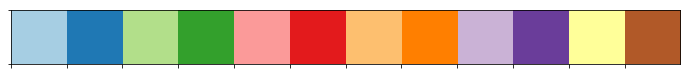

In [2]:
colorpalettte=sns.palplot(sns.color_palette("Paired", 12))
colors=sns.color_palette("Paired",12)
#colors=sns.color_palette("husl",8)
#For more colors see https://seaborn.pydata.org/tutorial/color_palettes.html

#   Read Input data from one codex 

In [3]:
phylum=pd.read_table("../data/PhylumN0.txt", index_col=0)
phylum.index.name=None
phylum = phylum.sort_values('S1', ascending=False)

clase=pd.read_table("../data/classN0.txt", index_col=0)
clase.index.name=None
clase = clase.sort_values('S1', ascending=False) 

order = pd.read_table ("../data/orderN0.txt", index_col=0)
order.index.name =None 
order = order.sort_values('S1', ascending=False) 

family=pd.read_table("../data/familyN0.txt", index_col=0)
family.index.name=None
family = family.sort_values('S1', ascending=False) 

genus=pd.read_table("../data/genusN0.txt", index_col=0)
genus.index.name="Genera"
genus = genus.sort_values('S1', ascending=False) 
ids=pd.read_table("../data/samples_id.tab",index_col=0)



In [4]:
print("Phylum:",phylum.shape)
print("Class",clase.shape)
print("Order",order.shape)
print("Family",family.shape)
print("Genera",genus.shape)

Phylum: (100, 12)
Class (168, 12)
Order (302, 12)
Family (539, 12)
Genera (1431, 12)


##   Get the relative abundances

In [5]:
genus_norm=genus/genus.sum()
family_norm=family/family.sum()
clase_norm=clase/clase.sum()
order_norm=order/order.sum()
phylum_norm=phylum/phylum.sum()
phylum_norm.head()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12
Proteobacteria,0.747237,0.702868,0.808853,0.744788,0.780539,0.700727,0.658075,0.733638,0.639115,0.678309,0.644841,0.696960
Bacteria unclassified,0.059517,0.034961,0.035847,0.047157,0.047111,0.079588,0.055873,0.056329,0.069914,0.089979,0.107101,0.078031
Actinobacteria,0.057407,0.023794,0.030435,0.058205,0.043087,0.077468,0.072738,0.054683,0.073210,0.077537,0.078816,0.078704
Cyanobacteria,0.024544,0.012627,0.041097,0.033365,0.023598,0.004529,0.025947,0.014370,0.060912,0.021099,0.002997,0.004649
Bacteroidetes,0.023964,0.075031,0.034298,0.016903,0.041204,0.013538,0.022228,0.022338,0.016069,0.012817,0.015324,0.011257


## Sort by sampling point


In [6]:
sortedcolumns = ['S1', 'S4', 'S7', 'S10',
                 'S2','S5','S8','S11',
                 'S3','S6','S9','S12']
genus_norm_sort=genus_norm[sortedcolumns]

genus_norm_sort.columns = ['A1', 'A2','A3','A4', 'B1','B2','B3','B4', 'C1','C2','C3','C4']
genus_norm_sort.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4
Genera,,,,,,,,,,,,
Bacteria unclassified,0.059515,0.047151,0.055871,0.089966,0.034961,0.047101,0.056328,0.107092,0.035846,0.079576,0.069912,0.078015
Rhodobacteraceae unclassified,0.054424,0.054891,0.030098,0.029302,0.052040,0.043849,0.026988,0.017602,0.061240,0.028902,0.033903,0.024710
Proteobacteria unclassified,0.045071,0.040685,0.045867,0.055118,0.025035,0.037658,0.040417,0.054158,0.032794,0.061464,0.051602,0.070002
Alphaproteobacteria unclassified,0.038821,0.036227,0.029089,0.033086,0.026275,0.026218,0.021711,0.023048,0.029209,0.035501,0.032306,0.030460
Actinobacteria unclassified_class_1760,0.026819,0.022706,0.029579,0.033386,0.010802,0.019086,0.023670,0.037189,0.014154,0.037187,0.032238,0.034863


In [7]:
genusRB=genus_norm[genus_norm<=0.01]
genusRB=genusRB.dropna()
#genusRB.to_csv("../data/rarebiosphere.csv",sep="\t")

In [8]:
dry=['Borreliella', 'Halanaerobiaceae unclassified', 'Candidatus Protochlamydia',
'Marinimicrobium', 'Methanohalophilus', 'Gramella', 'Kordia','Peptostreptococcus',
'Marivirga', 'Halobacteroidaceae unclassified', 'Planococcaceae unclassified', 
'Peptoclostridium']

In [9]:
water=['Anaerolinea', 'Candidatus Magasanikbacteria unclassified', 'Myxococcales unclassified',
      'Nitrospira', 'Shewanella', 'Lachnoclostridium', 'Candidatus Collierbacteria unclassified',
      'Rikenellaceae unclassified', 'Ornatilinea']

In [10]:
df=genusRB.T[water]
df.head()


Genera,Anaerolinea,Candidatus Magasanikbacteria unclassified,Myxococcales unclassified,Nitrospira,Shewanella,Lachnoclostridium,Candidatus Collierbacteria unclassified,Rikenellaceae unclassified,Ornatilinea
S1,0.00000,0.000000,0.002856,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
S2,0.00000,0.000146,0.000365,0.00000,0.000073,0.000073,0.000073,0.000000,0.000000
S3,0.00000,0.000000,0.000786,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
S4,0.00022,0.000024,0.003135,0.00022,0.000024,0.000049,0.000049,0.000024,0.000269
S5,0.00000,0.000029,0.003252,0.00000,0.000228,0.000000,0.000000,0.000086,0.000371


In [11]:
def median_sort(df):
    """Sort the columns acording to the median"""
    median_sorted = df.median().argsort()
    df_sorted = df.T.ix[median_sorted].T
    return df_sorted

In [12]:
def std_sort(df):
    std_sorted = df.std().argsort()
    df_sorted  = df.T.ix[std_sorted].T
    return df_sorted 

In [13]:
genus_norm_median=median_sort(genus_norm)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [14]:
genus_norm_median_sort = genus_norm_median.sort_values('S1', ascending=False) 

## Abundant >=0.01


In [15]:
abundant=genus_norm[genus_norm>0.01]
abundant=abundant.dropna()
abundant= median_sort(abundant)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [16]:
abundant.head()


,S8,S2,S7,S11,S3,S5,S12,S9,S10,S6,S4,S1
Genera,,,,,,,,,,,,
Bacteria unclassified,0.056328,0.034961,0.055871,0.107092,0.035846,0.047101,0.078015,0.069912,0.089966,0.079576,0.047151,0.059515
Rhodobacteraceae unclassified,0.026988,0.052040,0.030098,0.017602,0.061240,0.043849,0.024710,0.033903,0.029302,0.028902,0.054891,0.054424
Proteobacteria unclassified,0.040417,0.025035,0.045867,0.054158,0.032794,0.037658,0.070002,0.051602,0.055118,0.061464,0.040685,0.045071
Alphaproteobacteria unclassified,0.021711,0.026275,0.029089,0.023048,0.029209,0.026218,0.030460,0.032306,0.033086,0.035501,0.036227,0.038821
Actinobacteria unclassified_class_1760,0.023670,0.010802,0.029579,0.037189,0.014154,0.019086,0.034863,0.032238,0.033386,0.037187,0.022706,0.026819


# Dominant taxa >0.01 

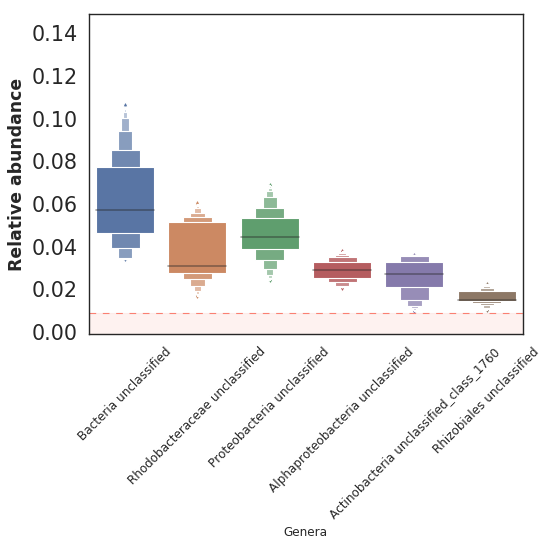

In [39]:
sns.set_style("white")
#sns.set(font_scale=0.9) 
plt.figure(figsize=(7,5))
#plt.title('C', loc='left', size='xx-large', weight='bold')
plt.xticks(size='medium')
plt.xticks(rotation=45)
plt.yticks(size='xx-large')
plt.ylabel("Relative abundance", size="x-large", weight='bold')          
sns.boxenplot(data=abundant.T) 
plt.axhline(0.01,color='salmon', ls="--", linewidth=1) 
plt.axhspan(0, 0.01, alpha=0.1, color='salmon')
plt.ylim(0,0.15)
#plt.tight_layout()
plt.savefig("../figures/01_Fig2_poster.png",dpi=800)

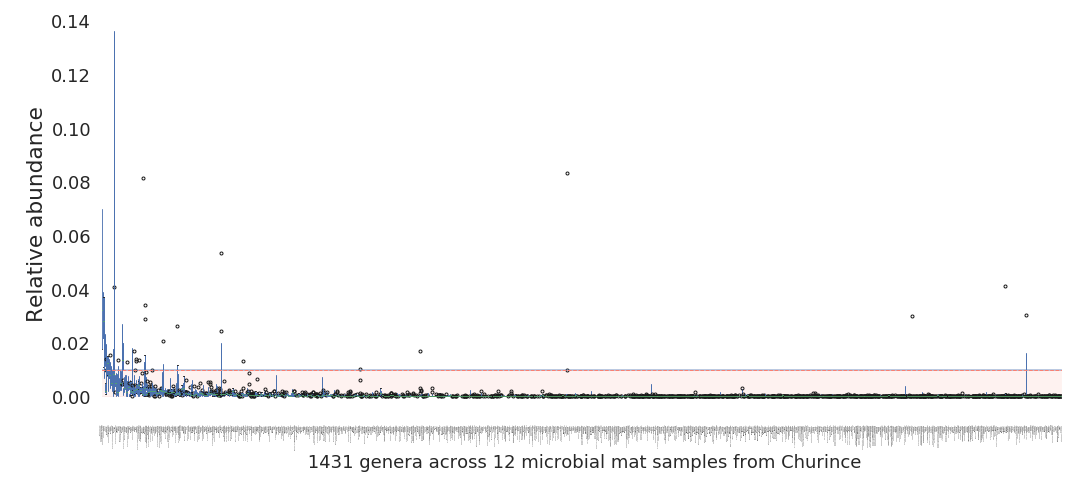

In [32]:
#sns.set_style("darkgrid")
#ax1=genus_norm_median.boxplot(figsize=(15,7))
ax1=genus_norm_median_sort.T.boxplot(figsize=(15,7), sym='.')
#plt.subplots_adjust(bottom=0.25)
plt.xlabel(" 1431 genera across 12 microbial mat samples from Churince")
plt.yticks(fontsize=18)
plt.xticks(rotation=90, fontsize=0.5)
plt.axhline(0.01, alpha=0.5)
plt.ylabel("Relative abundance",size='large' )
plt.axhline(0.01,color='salmon', ls="--", linewidth=1) 
plt.axhspan(0, 0.01, alpha=0.1, color='salmon')
plt.annotate('Low abundant taxa (rare biosphere)',(-0.5,0.15), size='large')
plt.tight_layout()
plt.savefig("../figures/03_Figure2_poster.png",dpi=800)

## Microbial mat core at genus level 

In [27]:
core=pd.read_excel("../data/corenum.xlsx")
core=core.sort_values("S11" , ascending=False)
core.shape

(373, 12)

In [28]:
core_sorted=core[sortedcolumns]
core_sorted.columns = ['A1', 'A2','A3','A4', 'B1','B2','B3','B4', 'C1','C2','C3','C4']
core_sorted.head()

,A1,A2,A3,A4,B1,B2,B3,B4,C1,C2,C3,C4
Desulfatitalea,0.007739,0.001445,0.027849,0.018698,0.018758,0.089011,0.136273,0.114352,0.110800,0.017919,0.009070,0.016270
Bacteria unclassified,0.059515,0.047151,0.055871,0.089966,0.034961,0.047101,0.056328,0.107092,0.035846,0.079576,0.069912,0.078015
Proteobacteria unclassified,0.045071,0.040685,0.045867,0.055118,0.025035,0.037658,0.040417,0.054158,0.032794,0.061464,0.051602,0.070002
Actinobacteria unclassified_class_1760,0.026819,0.022706,0.029579,0.033386,0.010802,0.019086,0.023670,0.037189,0.014154,0.037187,0.032238,0.034863
Desulfovibrio,0.006332,0.003748,0.015135,0.011091,0.009926,0.009186,0.020248,0.027100,0.011864,0.019653,0.017291,0.023854


In [29]:
df2plot=core_sorted[core_sorted>0.001]
df2plot=df2plot.dropna()
df2plot.shape

(58, 12)

In [30]:
plt.style.use('classic')

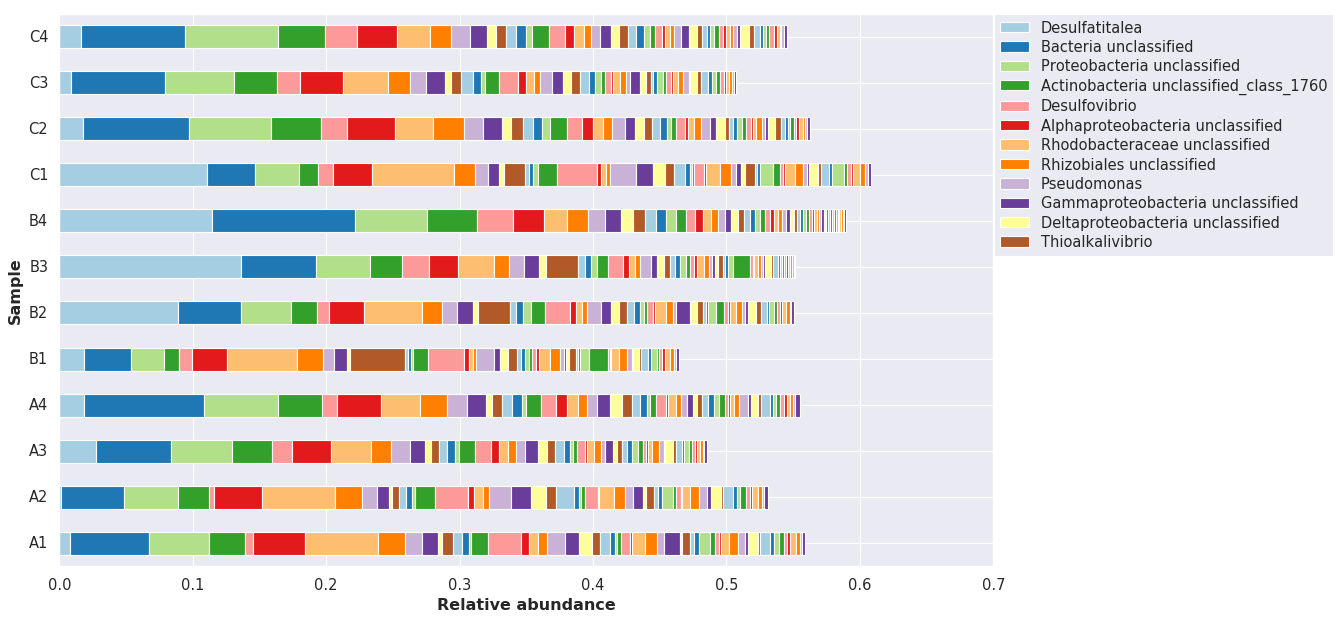

In [44]:
#sns.set_style("white")
sns.set(font_scale=1.2)
ax1=df2plot.T.plot(kind='barh',stacked=True,color=colors,figsize=(17,8))
plt.ylabel("Sample", weight='bold')
plt.xlabel("Relative abundance", weight="bold")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.25)
lines, labels = ax1.get_legend_handles_labels()
ax1.legend(lines[:20], labels[:12], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.05 ,labelspacing=0.3)

#legend botom 
#ax1.legend(lines[:20], labels[:12], bbox_to_anchor=(0.5, -0.05), loc='upper center', borderaxespad=2 ,labelspacing=0.3,
#          ncol=2, mode="expand", title='Family')
plt.tight_layout()
plt.savefig("../figures/04_Figure2_poster.png",dpi=800,)

In [122]:
coreRB=core[core<=0.01]
coreRB=coreRB.dropna()                        
coreRB.shape

(344, 12)

## Sort and group by site (A, B, C) 

In [94]:
genus_norm_a=genus_norm[['S1', 'S4', 'S7', 'S10']]
genus_norm_b=genus_norm[['S2', 'S5', 'S8', 'S11']]
genus_norm_c=genus_norm[['S3', 'S6', 'S9', 'S12']]

family_norm_a=family_norm[['S1', 'S4', 'S7', 'S10']]
family_norm_b=family_norm[['S2', 'S5', 'S8', 'S11']]
family_norm_c=family_norm[['S3', 'S6', 'S9', 'S12']]

genus_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
genus_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
genus_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']

family_norm_a.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
family_norm_b.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']
family_norm_c.columns = ['Autumn 2012', 'Spring 2013', 'Autumn 2013', 'Spring 2014']


# Fold Change log10

In [95]:
fam_norm_a_n =family_norm_a.T/family_norm_a.T.iloc[0]
fam_norm_b_n =family_norm_b.T/family_norm_b.T.iloc[0]
fam_norm_c_n =family_norm_c.T/family_norm_c.T.iloc[0]

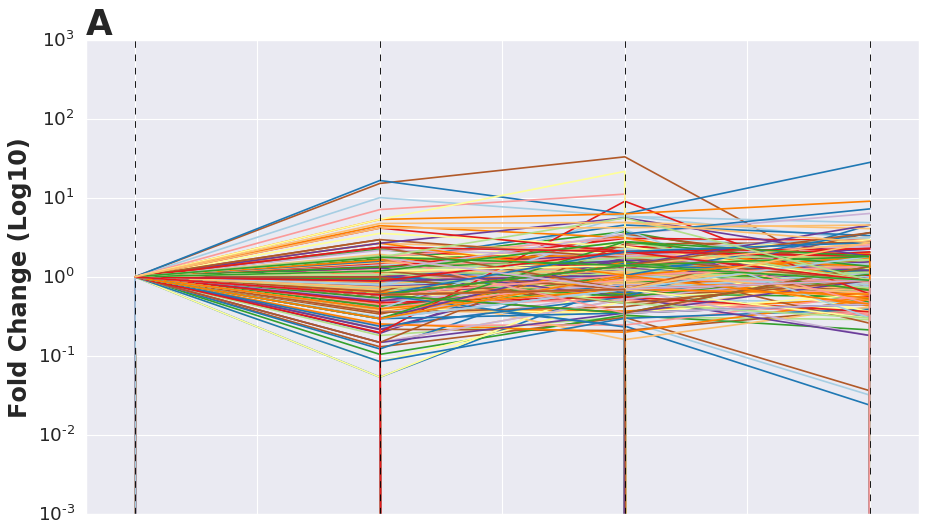

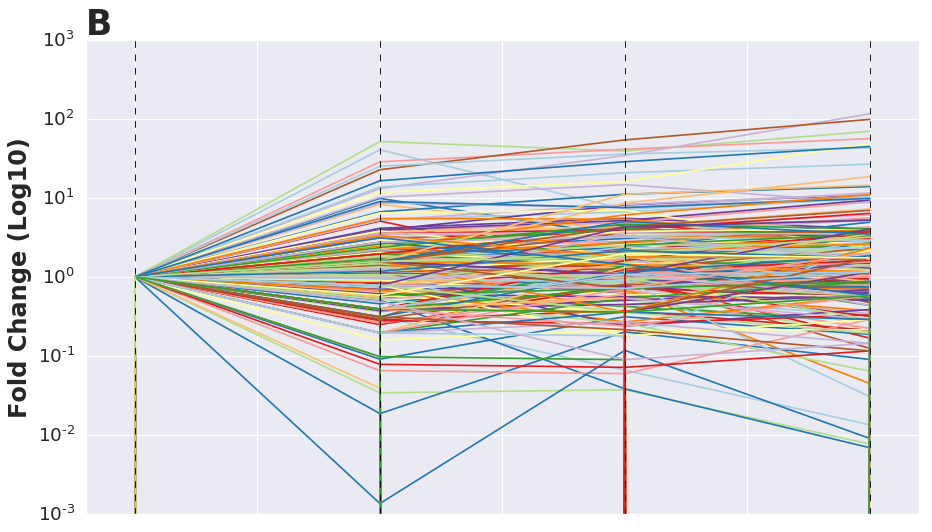

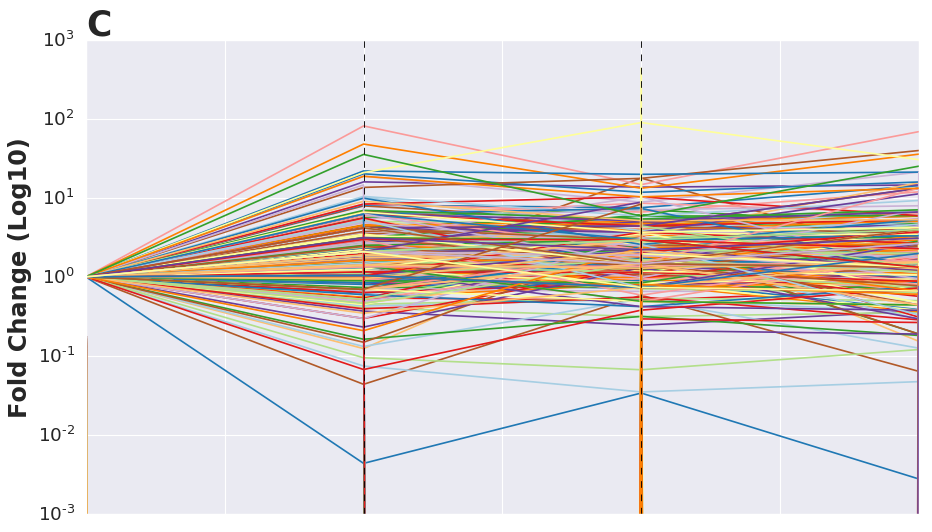

In [97]:
sns.set(font_scale=1.5)

ax=fam_norm_a_n.plot(legend=False,color=colors, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("A", weight='bold', size='xx-large', loc='left')
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()

ax=fam_norm_b_n.plot(legend=False,color=colors, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.setp(ax.get_xticklabels(), rotation=45)
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("B", weight='bold', size='xx-large', loc='left')
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
ax.xaxis.set_major_formatter(plt.NullFormatter())
plt.tight_layout()


fam_norm_c_n =family_norm_c.T/family_norm_c.T.iloc[0]
fam_norm_c_n.plot(legend=False,color=colors, figsize=(12,7))
plt.yscale('log')
plt.ylim((10**-3, 10**3))
plt.ylabel('Fold Change (Log10)', size='large', weight='bold')
plt.title("C", weight='bold', size='xx-large', loc='left')
ax.set_xlim(-.2,3.2)
plt.axvline(0, linestyle='--', color='black', linewidth=0.8)
plt.axvline(1, linestyle='--', color='black',linewidth=0.8)
plt.axvline(2, linestyle='--', color='black',linewidth=0.8)
plt.axvline(3, linestyle='--', color='black',linewidth=0.8)
plt.tight_layout()

#plt.savefig("siteA_family.log.png", bbox_inches='tight', dpi=400)

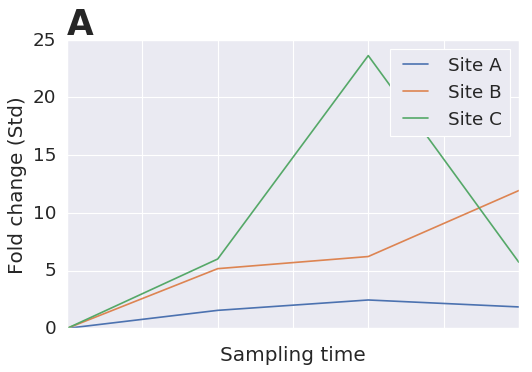

In [101]:
sns.set(font_scale=1.5)
sns.set_style("darkgrid")
sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']
for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    std_ = df_[~mask].T.std()
    std_.plot(label=nam_, figsize=(7,5))
plt.legend()
#plt.xticks(rotation=45)
plt.ylabel('Fold change (Std)')
plt.xlabel("Sampling time")
#plt.title("Fold change standard deviation (std)", size='large', weight='bold')
plt.title("A", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
#plt.savefig("../figures/Foldchangestd.png", dpi=600) 

''

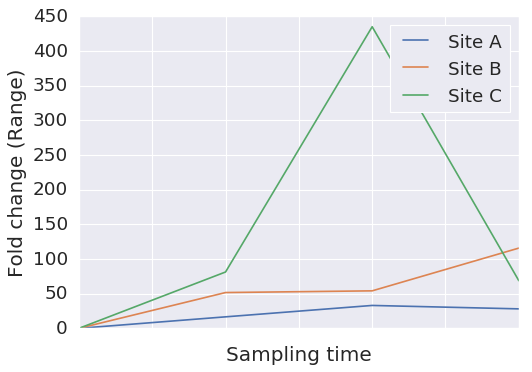

In [102]:
sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']
for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    range_ = df_[~mask].T.max() - df_[~mask].T.min()
    range_.plot(label=nam_,figsize=(7,5))
plt.legend()
plt.ylabel('Fold change (Range)')
plt.xlabel("Sampling time")
#plt.title("Fold change range", size='large', weight='bold')
#plt.title("A", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
#plt.savefig("../figures/FoldchangeRange.png", dpi=600) 

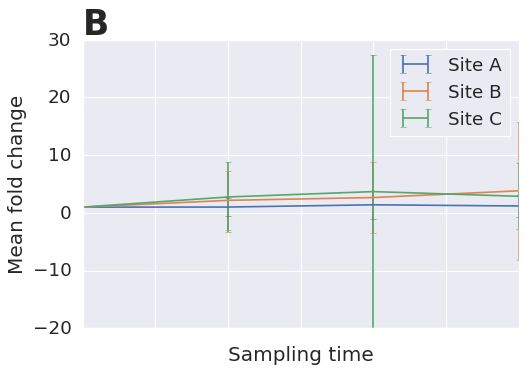

In [103]:
sns.set(font_scale=1.5)
sitios = [fam_norm_a_n, fam_norm_b_n, fam_norm_c_n]
names = ['Site A', 'Site B', 'Site C']

for i in range(3):
    df_ = sitios[i]
    nam_ = names[i]
    mask = np.isnan(df_) | np.isinf(df_)
    mean_ = df_[~mask].T.mean()
    std_ = df_[~mask].T.std()
    mean_.plot(label=nam_, yerr=std_,figsize=(7,5) )

plt.legend()
plt.ylabel('Mean fold change')
plt.xlabel("Sampling time")
#plt.title("Fold change range", size='large', weight='bold')
plt.title("B", loc='left', size="xx-large", weight='bold')
plt.tight_layout()
#plt.savefig("../figures/FoldchangeMean.png", dpi=600) 

In [16]:
#DTAFRAME melting

In [104]:
ma = fam_norm_a_n.T.melt()
ma['site'] = ['A'] * len(ma)

mb = fam_norm_b_n.T.melt()
mb['site'] = ['B'] * len(mb)

mc = fam_norm_c_n.T.melt()
mc['site'] = ['C'] * len(mc)

mconcat = pd.concat([ma, mb, mc])
mmask = np.isnan(mconcat['value']) | np.isinf(mconcat['value'])

### Boxplot of normalized abundance change --- Total y scale

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

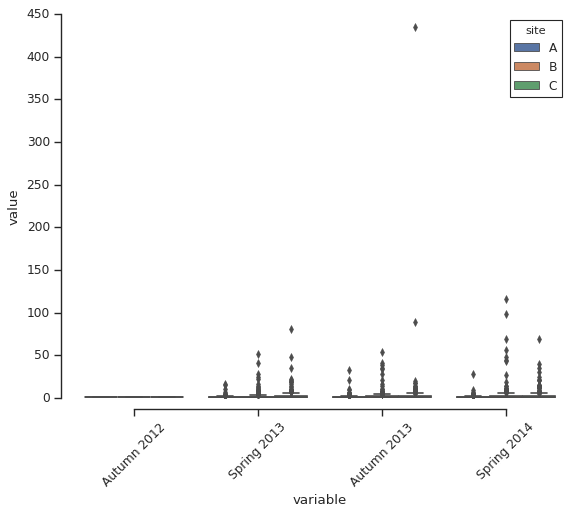

In [107]:
import seaborn as sns
sns.set(style="ticks")
sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask])
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
#not observable differences

### Boxplot of normalized abundance change --- Resized y scale

Text(0,0.5,'Fold change')

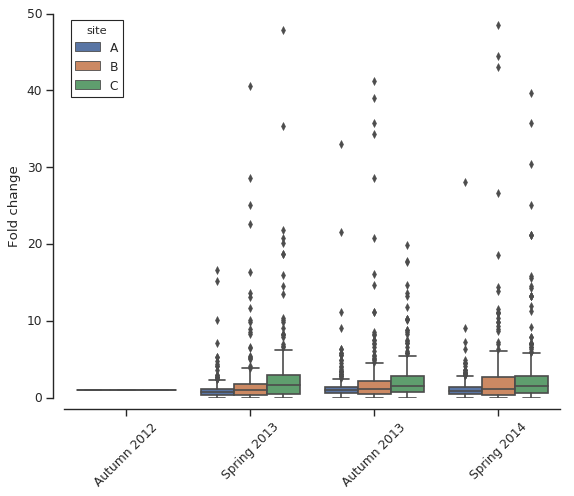

In [108]:
sns.set(style="ticks")
sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask])
sns.despine(offset=10)#, trim=True)
plt.xticks(rotation=45)
plt.ylim((0,50))
plt.yticks(range(0,51,10), range(0,51,10))
plt.xlabel('')
plt.ylabel('Fold change')
#not observable differences

## by season

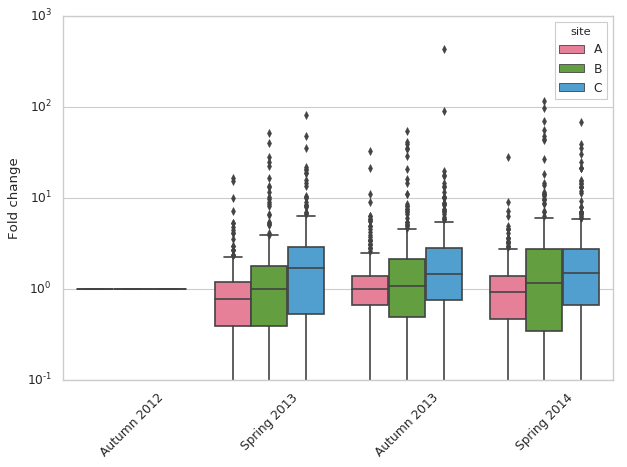

In [109]:
sns.set(font_scale=1.8)
sns.set(font_scale=1.5)
sns.set(style='whitegrid')
ax=sns.boxplot(x="variable", y="value", hue="site", data=mconcat[~mmask],palette=sns.husl_palette(3, h=2) )
#sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('')
plt.ylabel('Fold change')
plt.tight_layout()

## by site

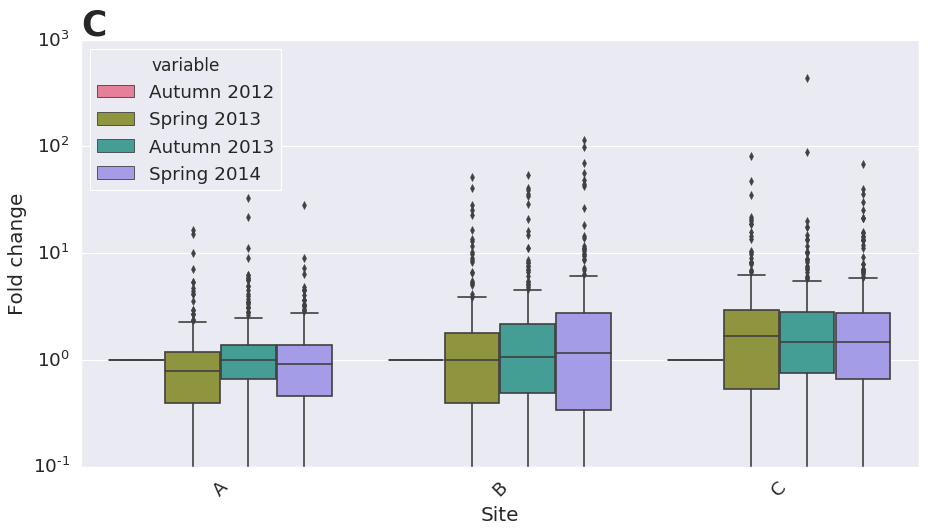

In [110]:
fig = plt.figure(figsize=(12, 7))
sns.set(font_scale=1.5)
sns.boxplot(x="site", y="value", hue="variable", data=mconcat[~mmask],palette=sns.husl_palette(4, h=2))
#sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.yscale('log')
plt.xlabel('Site')
plt.ylabel('Fold change')
plt.title("C", loc='left', weight='bold', size='xx-large')
plt.tight_layout()
plt.savefig("../figures/Sup_boxplot_Fold_change", dpi=500)